In [55]:
import os

datasetDir = "/Users/dibrov/Documents/PhD/data/franz"

In [2]:
foldName = "WT_25deg_160413"

In [3]:
i = 2

endName=suff+str(i)
fullFolderName = datasetDir+foldName+"-"+endName

In [4]:
fullFolderName

'/Users/dibrov/Documents/PhD/data/franz/WT_25deg_160413-02'

In [6]:
import shutil

In [7]:
os.makedirs(fullFolderName+"/"+"sth")

In [23]:
import subprocess

pathToJar = "/Users/dibrov/Documents/PhD/software/surfex/build/libs/all-in-one-jar-0.1.0.jar"

i = 13
l = [5,8,11,14,17,20,23]
while (i<=200):
    
    suff = ''
    if (i<10):
        suff='0'
    
    currDir = datasetDir+foldName+"-"+suff+str(i)
    
    if os.path.exists(currDir + "/sd"):
        shutil.rmtree(currDir + "/sd")


    os.makedirs(currDir + "/sd")
    for k in l:
        fName = "P"+str(k)+".tif"
        shutil.copy(currDir + "/"+fName, currDir + "/sd/"+fName)
        subprocess.call(['java', '-jar', pathToJar, currDir+"/sd/", fName])
    
    print(i, end='\r')
    i+=1

    

KeyboardInterrupt: 

0

In [24]:
with open(datasetDir + foldName + "-"+suff+str(10)+"/sd/"+"P5.tif_proj.raw", 'rb') as f:
    data = f.read()

In [47]:
import numpy as np
# a = np.fromfile(datasetDir + foldName + "-"+suff+str(10)+"/sd/"+"P5.tif_proj.raw", dtype=np.uint16)
a = np.fromfile(datasetDir + foldName + "-"+suff+str(10)+"/sd/"+"P5.tif_hm_MM.raw", dtype=np.uint8)

In [48]:
a = a.reshape((520,692))

In [49]:
a.shape

(520, 692)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=10,10

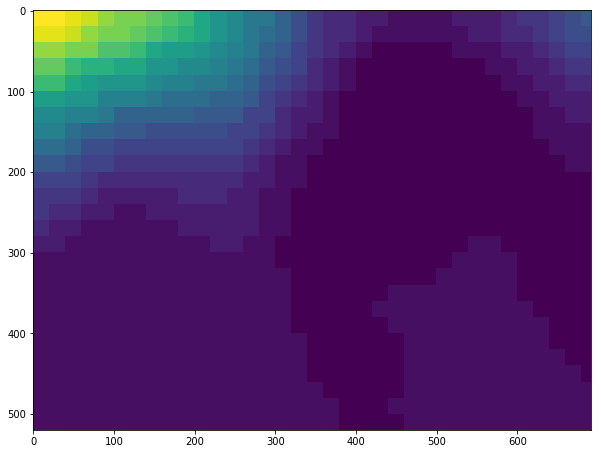

In [51]:
plt.imshow(a)

In [52]:
a.min()

11

In [53]:
a.max()

36

In [69]:
import tifffile

def stackAndHMTOTrainingSlices(pathToSourceDataset=None, tpFolder=None, fTileNumber=None, pathToFinalDataset=None):
    stack = tifffile.imread(pathToSourceDataset+"/"+tpFolder+"/sd/"+"P"+str(fTileNumber)+".tif")
    hm = np.fromfile(pathToSourceDataset+"/"+tpFolder+"/sd/"+"P"+str(fTileNumber)+".tif_hm_MM.raw", dtype=np.uint8).reshape((520,692))
    mask = np.zeros(stack.shape)
    z,x,y = stack.shape
    for i in range(x):
        for j in range(y):
              mask[hm[i,j], i,j] = 1
                
    
    for q in range(z):
        tifffile.imsave(pathToFinalDataset+"/raw/"+tpFolder+"_P"+str(fTileNumber)+"_"+str(q)+"_raw.tif", stack[q])
        tifffile.imsave(pathToFinalDataset+"/labels/"+tpFolder+"_P"+str(fTileNumber)+"_"+str(q)+"_labels.tif", mask[q].astype(np.uint16))

In [66]:
stackAndHMTOTrainingSlices(datasetDir, "WT_25deg_160413-03", 5, datasetDir+"/sd_dataset")

NameError: name 'stack' is not defined

In [70]:

i = 3
l = [5,8,11,14,17,20,23]
while (i<=4):
    
    suff = ''
    if (i<10):
        suff='0'
    
    currDir = datasetDir+foldName+"-"+suff+str(i)

    for k in l:
        stackAndHMTOTrainingSlices(datasetDir, foldName+"-"+suff+str(i),k,datasetDir+"/sd_dataset")
    
    print(i, end='\r')
    i+=1

    